<a href="https://colab.research.google.com/github/Bborub/bk-bridge-pedestrian/blob/main/Sector_ETFs_BS2_20Oct23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sector ETFs: SPDR Consumer Discretionary Select Sector ETF (XLY), SPDR Consumer Staples Select Sector ETF (XLP), SPDR Energy Select Sector ETF (XLE), SPDR Financial Select Sector ETF (XLF), SPDR Health Care Select Sector ETF (XLV), SPDR Industrial Select Sector ETF (XLI), SPDR Technology Select Sector ETF (XLK), SPDR Materials Select Sector ETF (XLB), Real Estate Select Sector SPDR Fund (XLRE), SPDR Utilities Select Sector ETF (XLU)   


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

[*********************100%%**********************]  1 of 1 completed


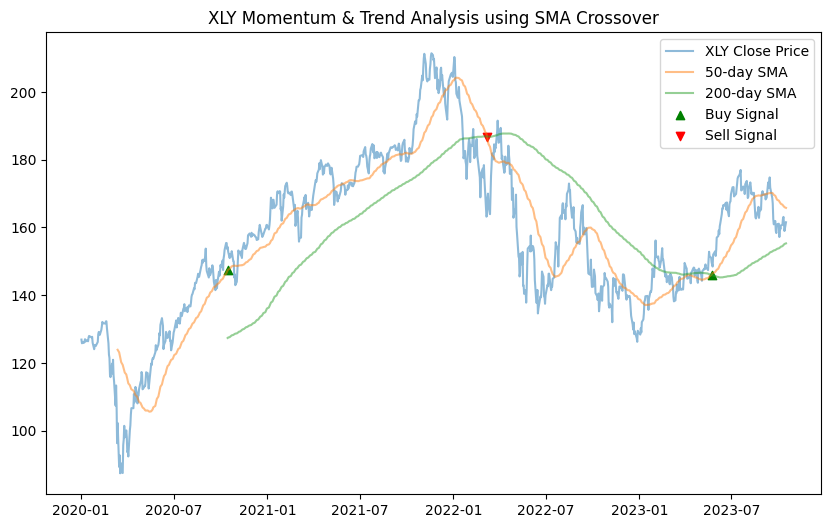

[*********************100%%**********************]  1 of 1 completed


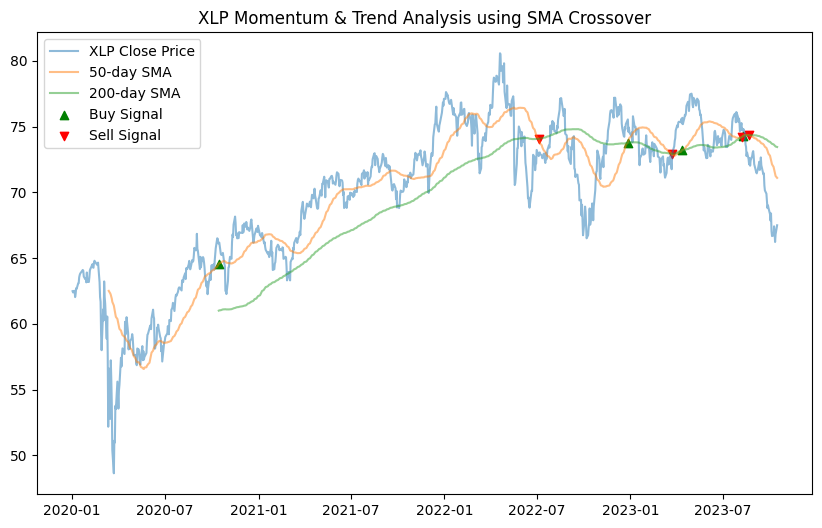

[*********************100%%**********************]  1 of 1 completed


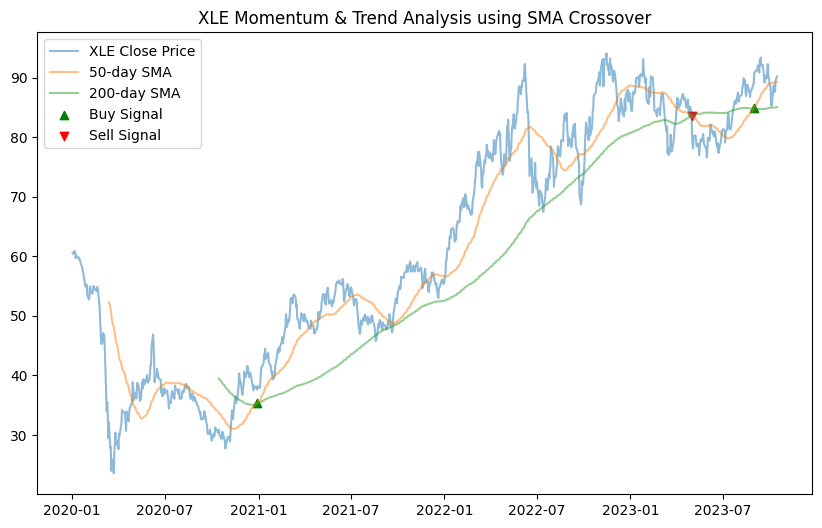

[*********************100%%**********************]  1 of 1 completed


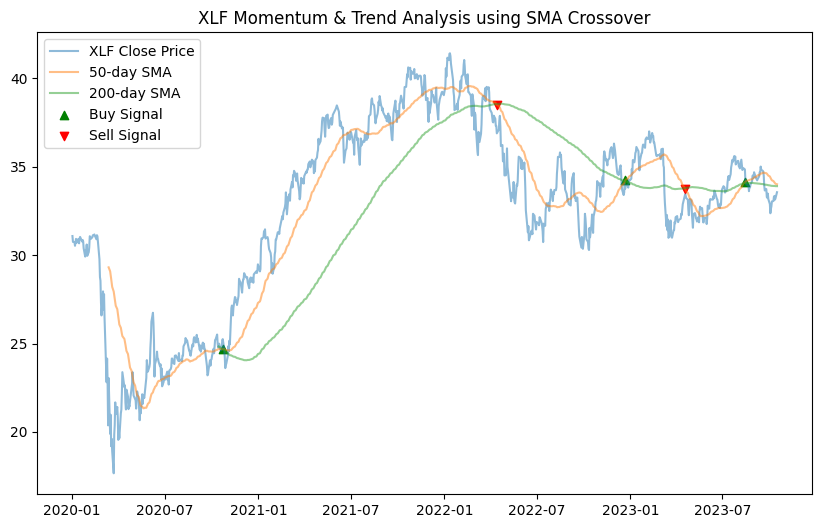

[*********************100%%**********************]  1 of 1 completed


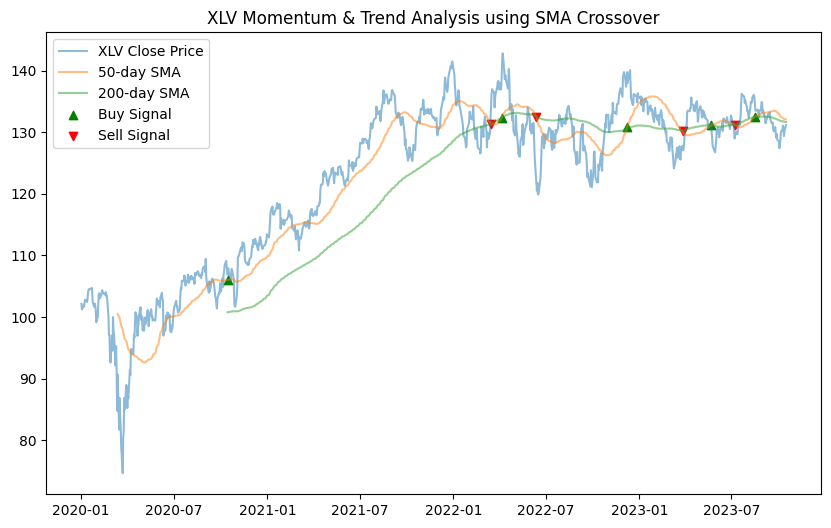

[*********************100%%**********************]  1 of 1 completed


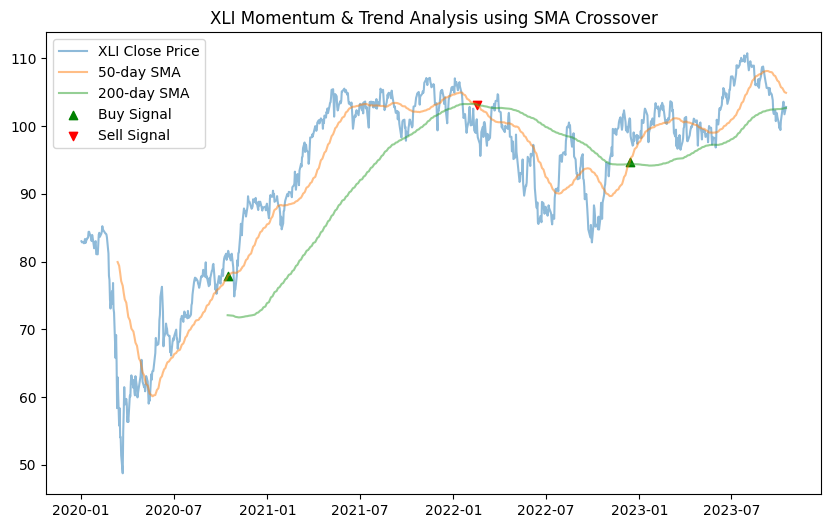

[*********************100%%**********************]  1 of 1 completed


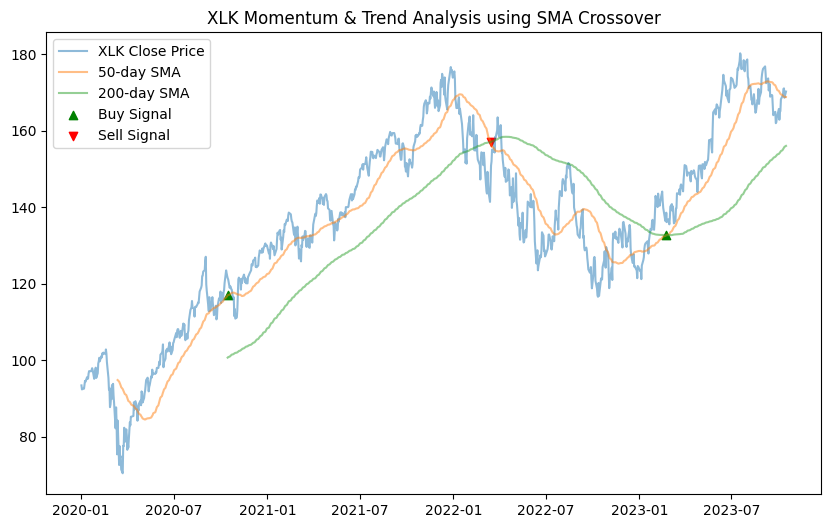

[*********************100%%**********************]  1 of 1 completed


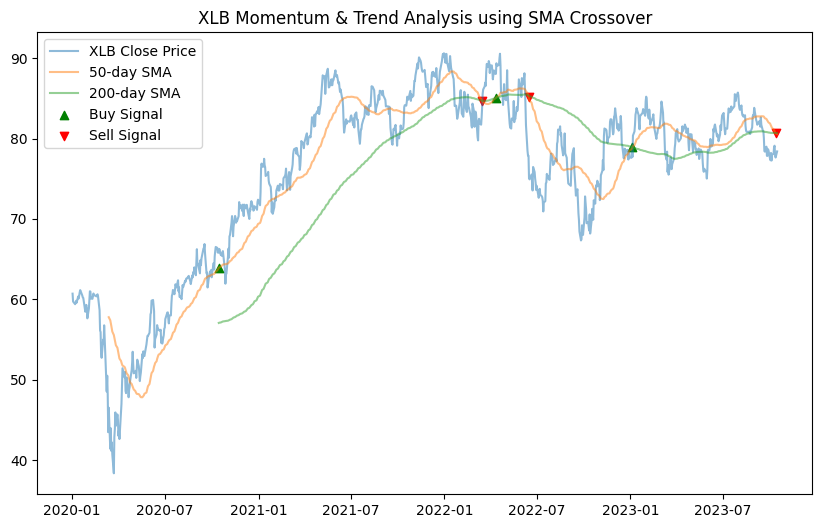

[*********************100%%**********************]  1 of 1 completed


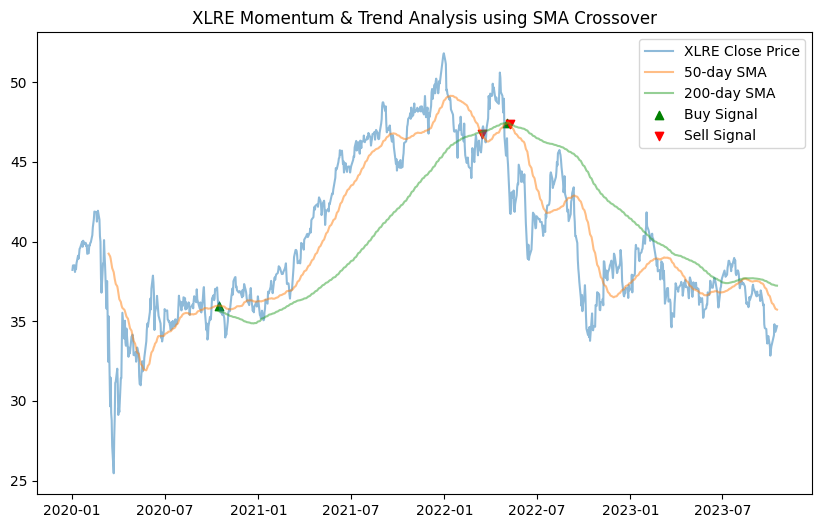

[*********************100%%**********************]  1 of 1 completed


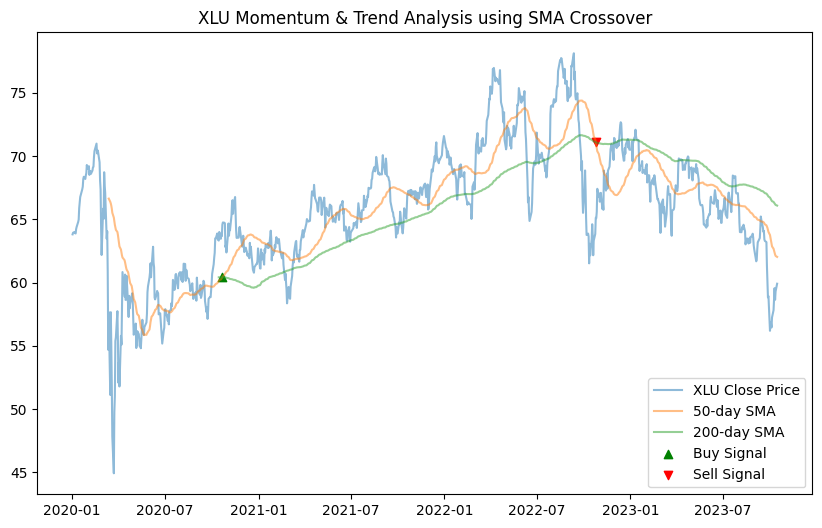

In [ ]:
def fetch_data(ticker_symbol):
    # Fetch historical data
    data = yf.download(ticker_symbol, start="2020-01-01", end="2023-10-17")
    return data['Close']

def sma_crossover(data, short_window=50, long_window=200):
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data
    signals['short_mavg'] = data.rolling(window=short_window).mean()
    signals['long_mavg'] = data.rolling(window=long_window).mean()

# Create signals
    signals['signal'] = 0.0
    signals.iloc[short_window:, signals.columns.get_loc('signal')] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['positions'] = signals['signal'].diff()

    return signals

tickers = ['XLY', 'XLP', 'XLE', 'XLF', 'XLV', 'XLI', 'XLK', 'XLB','XLRE', 'XLU']

for ticker in tickers:
    # Fetch data
    data = fetch_data(ticker)

    # Generate signals
    signals = sma_crossover(data)

    # Plotting
    plt.figure(figsize=(10,6))
    plt.plot(data, label=f'{ticker} Close Price', alpha=0.5)
    plt.plot(signals['short_mavg'], label='50-day SMA', alpha=0.5)
    plt.plot(signals['long_mavg'], label='200-day SMA', alpha=0.5)
    plt.scatter(signals[signals['positions'] == 1.0].index,
                signals['short_mavg'][signals['positions'] == 1.0],
                label='Buy Signal', marker='^', color='g', alpha=1)
    plt.scatter(signals[signals['positions'] == -1.0].index,
                signals['short_mavg'][signals['positions'] == -1.0],
                label='Sell Signal', marker='v', color='r', alpha=1)
    plt.title(f'{ticker} Momentum & Trend Analysis using SMA Crossover')
    plt.legend()
    plt.show()